In [96]:
import cv2
import numpy as np
import copy

# Read image
image = cv2.imread('screenshot_2.png')
image_original = copy.deepcopy(image)

# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv2.Canny(gray,200,255,apertureSize=3)

# Apply HoughLinesP method to
# to directly obtain line end points
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=20, # Min number of votes for valid line
            minLineLength=15, # Min allowed length of line
            maxLineGap=100 # Max allowed gap between line for joining them
)
lines_list=[]
# Iterate over points
for points in lines:
    # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),1)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
    
# Save the result image
cv2.imwrite('detectedLines.png',image)

True

In [97]:
max_dist = 0
final_x = ()
final_y = ()
for i in range(len(lines_list)):
    if math.dist(lines_list[i][0] , lines_list[i][1]) > max_dist: 
        print(lines_list[i] , math.dist(lines_list[i][0] , lines_list[i][1]))
        max_dist = math.dist(lines_list[i][0] , lines_list[i][1])
        final_x = lines_list[i][0]
        final_y = lines_list[i][1]
        
# image
cv2.line(image_original, final_x, final_y, (0,0,255), 5)
cv2.imwrite('longest_line.png',image_original)

[(1118, 626), (1742, 891)] 677.9387877972465
[(344, 300), (1559, 815)] 1319.64010245218
[(618, 326), (1919, 556)] 1321.1740990497808


True

In [41]:
final_x

(116, 392)

(116, 392)

In [31]:
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    match_mask_color = (255,) * channel_count
    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)
    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

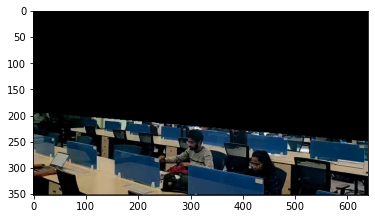

In [134]:
# 

%matplotlib inline
import matplotlib.pyplot as plt

import cv2
import numpy as np
import copy

image = cv2.imread('sample_frame.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# roi = [(0, 10),  (640,100), (640,350),(0,350)]
# roi = [[220, 120], [130, 200], [130, 300],
#                    [220, 380], [310, 300], [310, 200]]
roi = [[0,194],[0,350],[640,350],[640,250]]
width = 640
height = 350
# roi = [(1, 194),(636, 259),(637, 348),(0, 350),]
plt.imshow(region_of_interest(image, np.array([roi],np.int32)))

In [11]:
cv2.imread('first_frame_Video1.png').shape

(352, 640, 3)

ValueError: array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

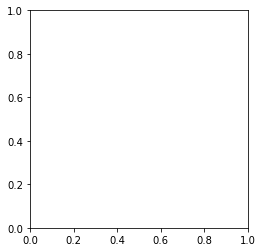

In [121]:
import cv2
import numpy as np
  
# Read an image
img = cv2.imread("image.png")
  
# Define an array of endpoints of Hexagon
points = np.array([[220, 120], [130, 200], [130, 300],
                   [220, 380], [310, 300], [310, 200]])
  
# Use fillPoly() function and give input as image,
# end points,color of polygon
# Here color of polygon will be green
cv2.fillPoly(img, pts=[points], color=(0, 255, 0))
  
# Displaying the image
plt.imshow("Hexagon", img)
  
# wait for the user to press any key to 
# exit window
# cv2.waitKey(0)
  
# Closing all open windows
# cv2.destroyAllWindows()

In [126]:
# Import necessary libraries
import cv2
import numpy as np

# Read an image
img = cv2.imread("image.png")

# Define an array of endpoints of Hexagon
points = np.array([[220, 120], [130, 200], [130, 300],
				[220, 380], [310, 300], [310, 200]])

# Use fillPoly() function and give input as image,
# end points,color of polygon
# Here color of polygon will be green
cv2.fillPoly(img, pts=[points], color=(0, 255, 0))

# Displaying the image
cv2.imshow("Hexagon", img)

# wait for the user to press any key to
# exit window
cv2.waitKey(0)

# Closing all open windows
cv2.destroyAllWindows()


In [135]:
arr = np.array([1, 2, 3, 4, 5, 6])
ts = arr.tostring()
ts

b'\x01\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00\x06\x00\x00\x00'

In [138]:
from google.cloud import bigquery
bq_client = bigquery.Client.from_service_account_json('creds.json')

In [139]:
# !pip install google-cloud-bigquery